# IPL DATA ANALYSIS
INDIAN PREMIER LEAGUE 2008-2019

##### NAME: JEMI ROSE THOMAS
##### ORGANISATION: ENTRI ELEVATE
##### DATE: 12.AUG.2024

## 1.OVERVIEW OF THE PROBLEM

Context:
The Indian Premier League (IPL) is one of the most popular cricket leagues attracting millions of viewers and featuring top-tier talent from around the world. Analyzing IPL data from 2008 to 2019 provides insights into team performances, player statistics, and trends that can be useful for fans, analysts, and teams.

## 2. OBJECTIVE

The objective of this project is to perform a comprehensive analysis of IPL data from 2008 to 2019, focusing on various aspects such as player performance, team performance, match outcomes, and trends over the years. The insights derived from this analysis can help in understanding key factors that contribute to success in the IPL and provide a historical perspective on the league's evolution.

#### Data Description
The datasets used for this analysis are:

##### A. Deliveries Dataset:

###### Detailed ball-by-ball data for each match.
###### Contains information like match_id, inning, batting_team, bowling_team, over, ball, batsman, bowler, runs, dismissals, etc.

##### B. Matches Dataset:

###### Summary information for each match.
###### Contains information like match_id, season, city, date, teams, toss_winner, toss_decision, match result, winner, win margins, player of the match, venue, umpires, etc.

In [17]:
import warnings
warnings.filterwarnings("ignore")

## 3. DATA SOURCE
https://www.kaggle.com/datasets/nowke9/ipldata

In [1]:
# Import all the Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

print ("Successfully Imported the libraries")

Successfully Imported the libraries


## 4. DATA COLLECTION
Loading the Datasets:

In [2]:
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

# Display the first few rows of each File
print(deliveries.head())
print(matches.head())

   match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0        

## 5. DATA PREPROCESSING:- DATA CLEANING
 ### 1. Identify Missing Values

In [6]:
# Check for missing values
print(matches.isnull().sum())
print(deliveries.isnull().sum())

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype:

### 2. Identify the Outliers

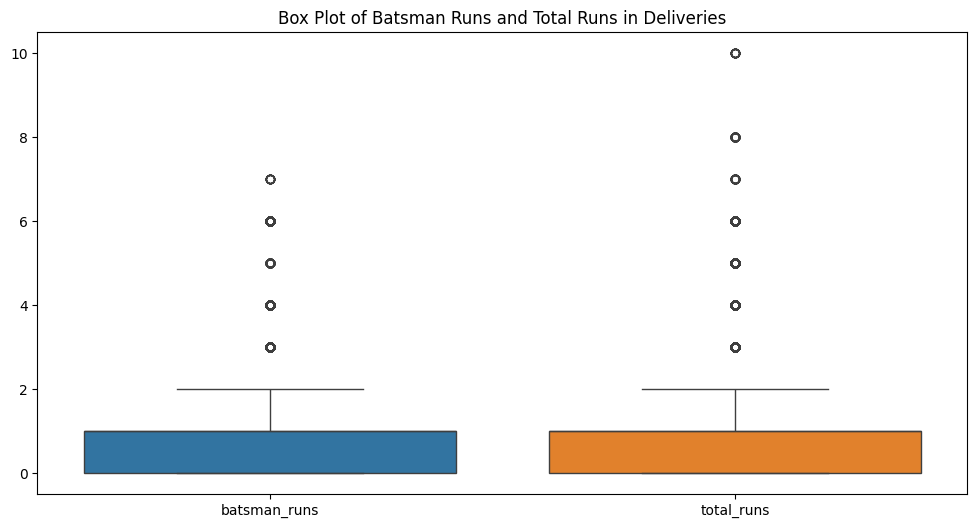

In [7]:
# Generate a box plot for some relevant features in the deliveries dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=deliveries[['batsman_runs', 'total_runs']])
plt.title('Box Plot of Batsman Runs and Total Runs in Deliveries')
plt.show()

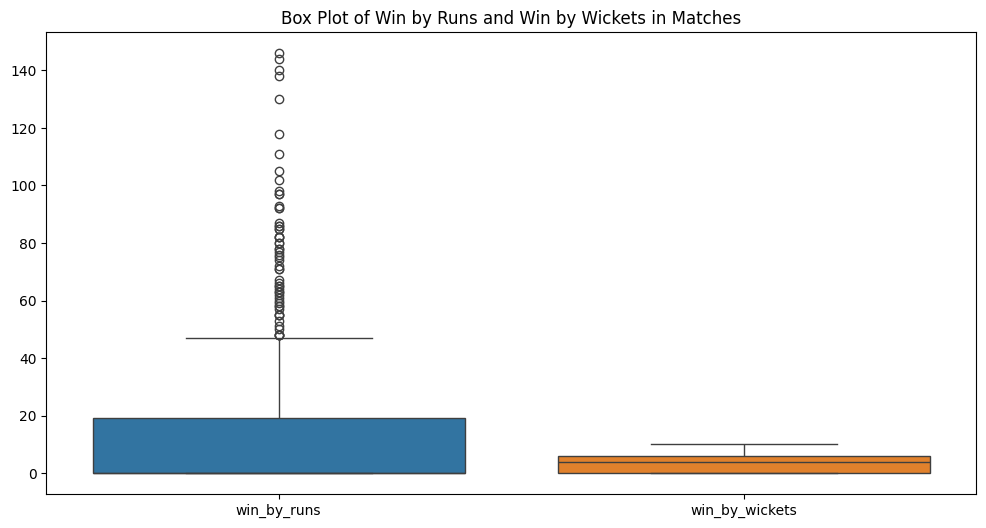

In [8]:
# Generate a box plot for some relevant features in the matches dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=matches[['win_by_runs', 'win_by_wickets']])
plt.title('Box Plot of Win by Runs and Win by Wickets in Matches')
plt.show()

### 3. Removing Outliers

In [10]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers in matches dataset
matches = remove_outliers_iqr(matches, ['win_by_runs', 'win_by_wickets'])
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


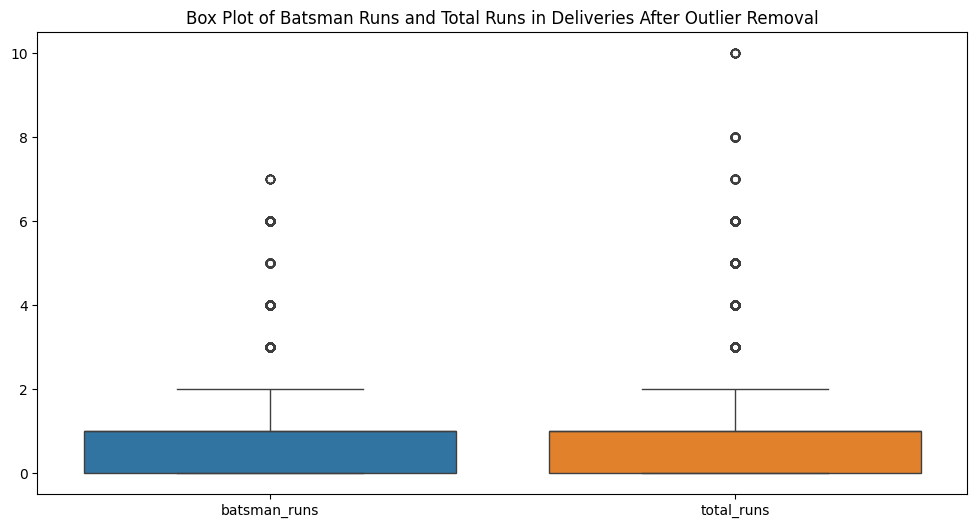

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=deliveries[['batsman_runs', 'total_runs']])
plt.title('Box Plot of Batsman Runs and Total Runs in Deliveries After Outlier Removal')
plt.show()

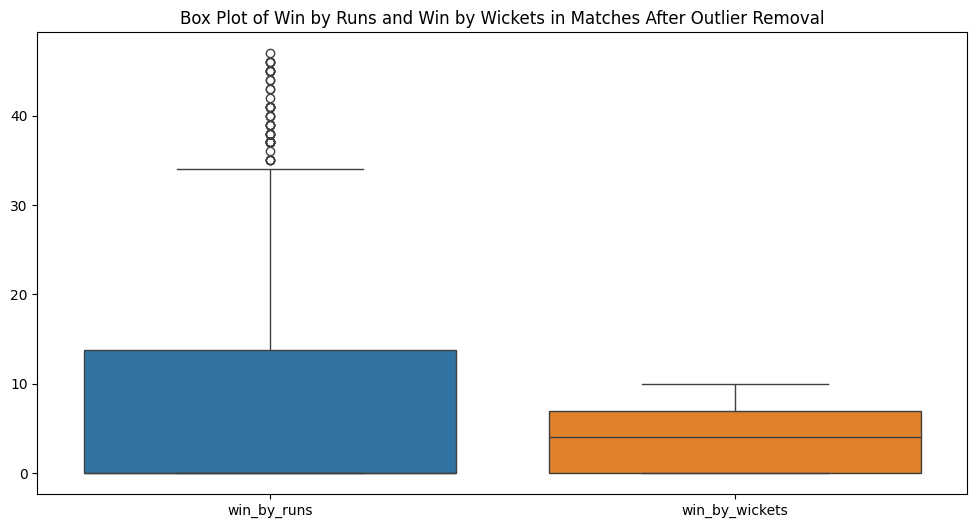

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=matches[['win_by_runs', 'win_by_wickets']])
plt.title('Box Plot of Win by Runs and Win by Wickets in Matches After Outlier Removal')
plt.show()

## 6. EXPLORATORY DATA ANALYSIS (EDA)
Exploratory Data Analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

In [13]:
matches.shape

(698, 18)

In [14]:
deliveries.shape

(179078, 21)

In [15]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [16]:
teams = {'Sunrisers Hyderabad':'SRH', 'Mumbai Indians':'MI', 'Gujarat Lions':'GL',
       'Rising Pune Supergiant':'RPS', 'Royal Challengers Bangalore':'RCB',
       'Kolkata Knight Riders':'KKR', 'Delhi Daredevils':'DC', 'Kings XI Punjab':'KXIP',
       'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR', 'Deccan Chargers':'SRH',
       'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW', 'Rising Pune Supergiants':'RPS',
       'Delhi Capitals':'DC'}

# Mapping the abbreviated team names
matches['team1'] = matches['team1'].map(teams)
matches['team2'] = matches['team2'].map(teams)
matches['toss_winner'] = matches['toss_winner'].map(teams)
matches['winner'] = matches['winner'].map(teams)
matches.head ()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,RCB,DC,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## 1. DATA DISTRIBUTION INSIGHT
### 1.1 HISTOGRAM

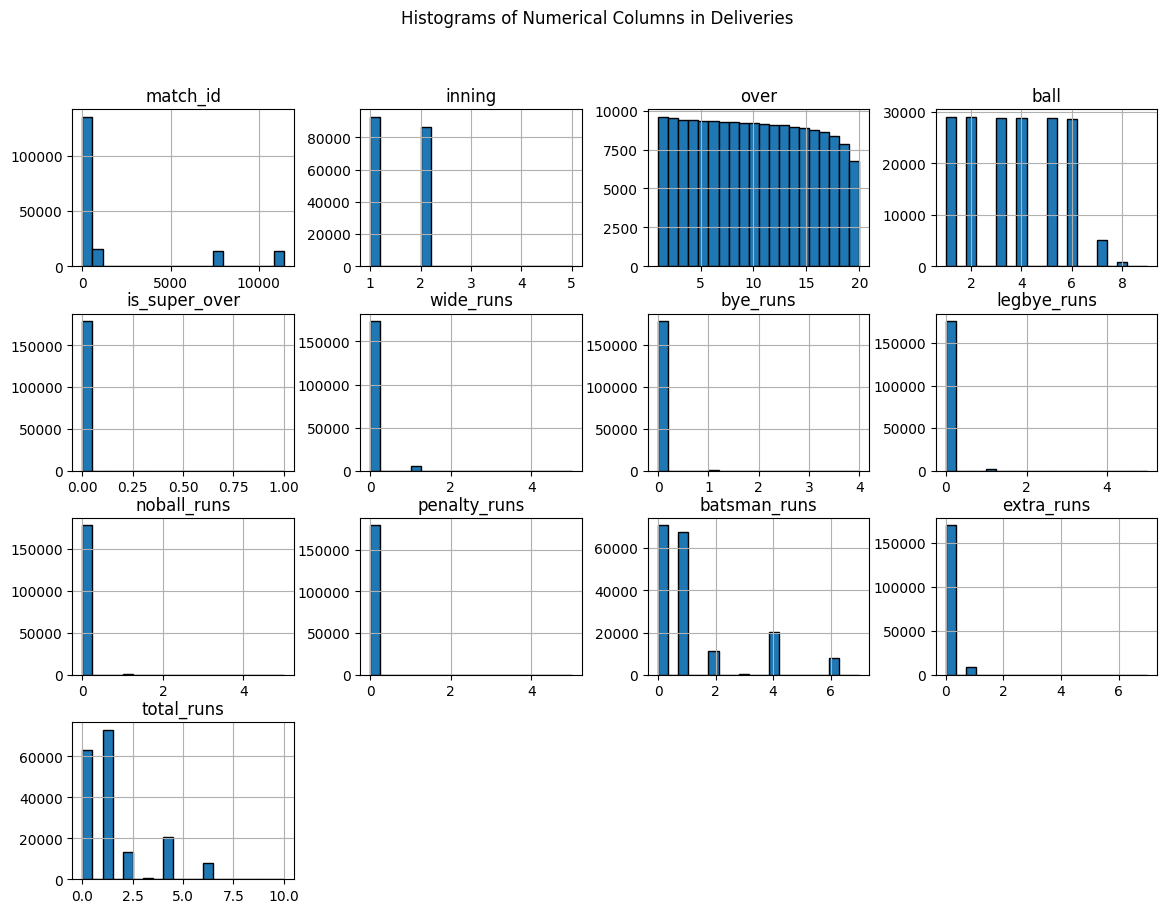

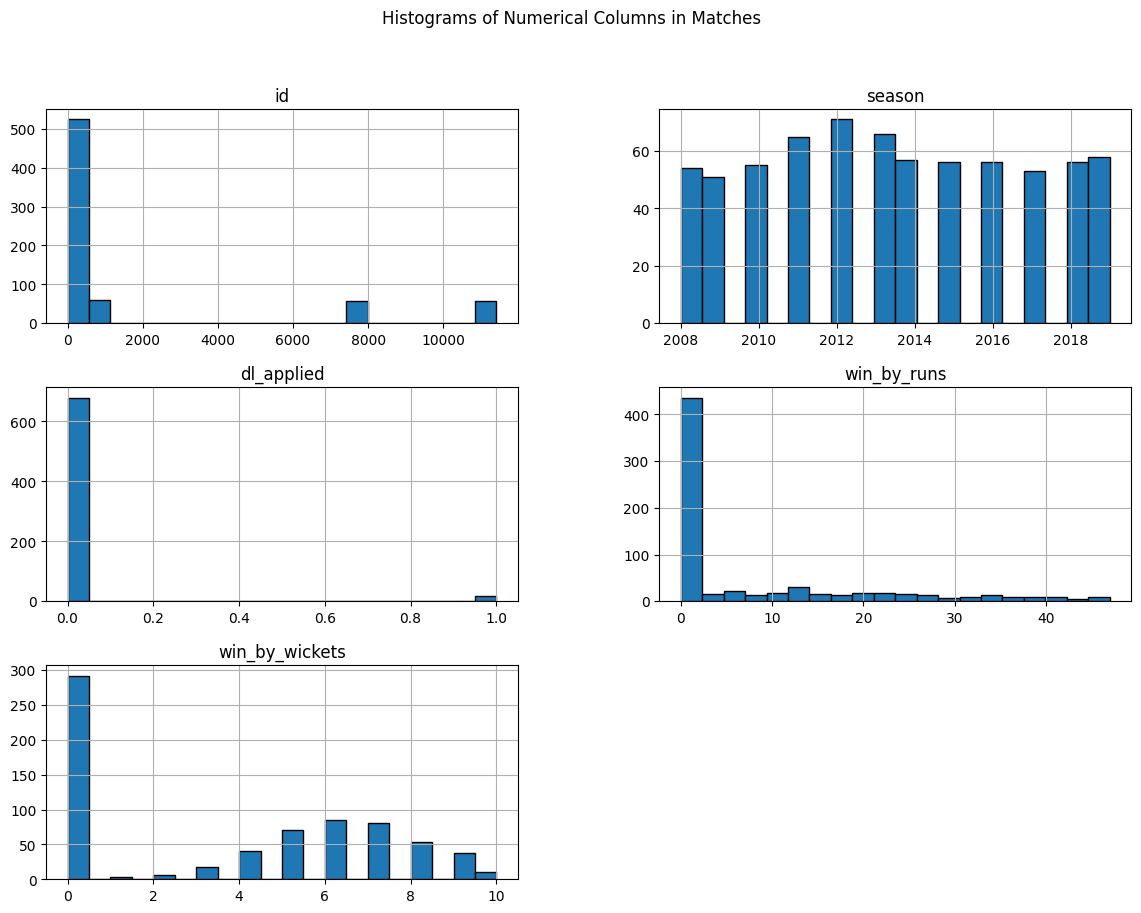

In [17]:
# Histogram for numerical columns in deliveries
deliveries.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Columns in Deliveries')
plt.show()

# Histogram for numerical columns in matches
matches.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.suptitle('Histograms of Numerical Columns in Matches')
plt.show()

### 1.2 BOX PLOT

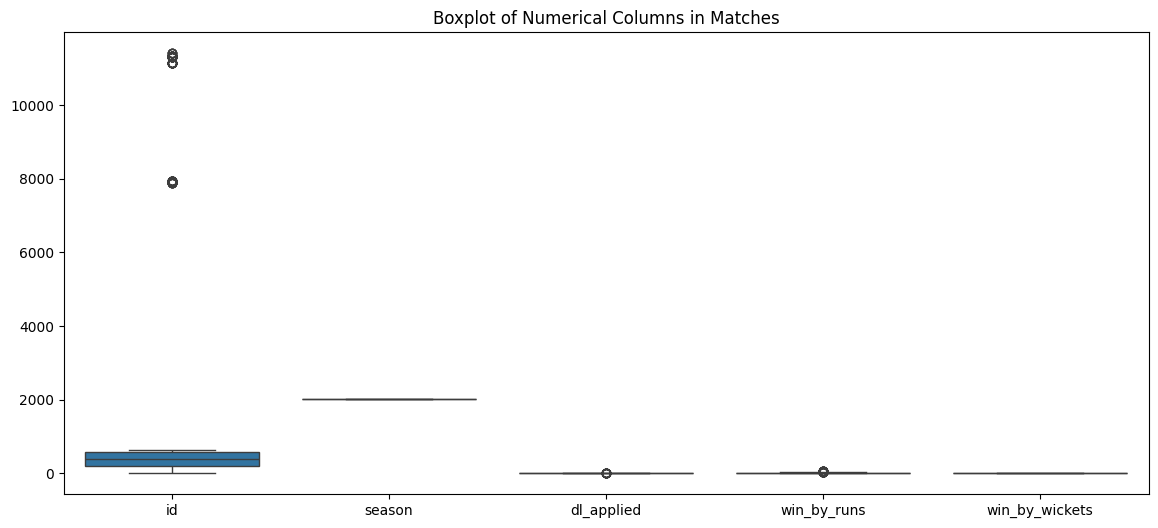

In [19]:
# Boxplot for numerical columns in matches
plt.figure(figsize=(14, 6))
sns.boxplot(data=matches.select_dtypes(include=[np.number]))
plt.title('Boxplot of Numerical Columns in Matches')
plt.show()

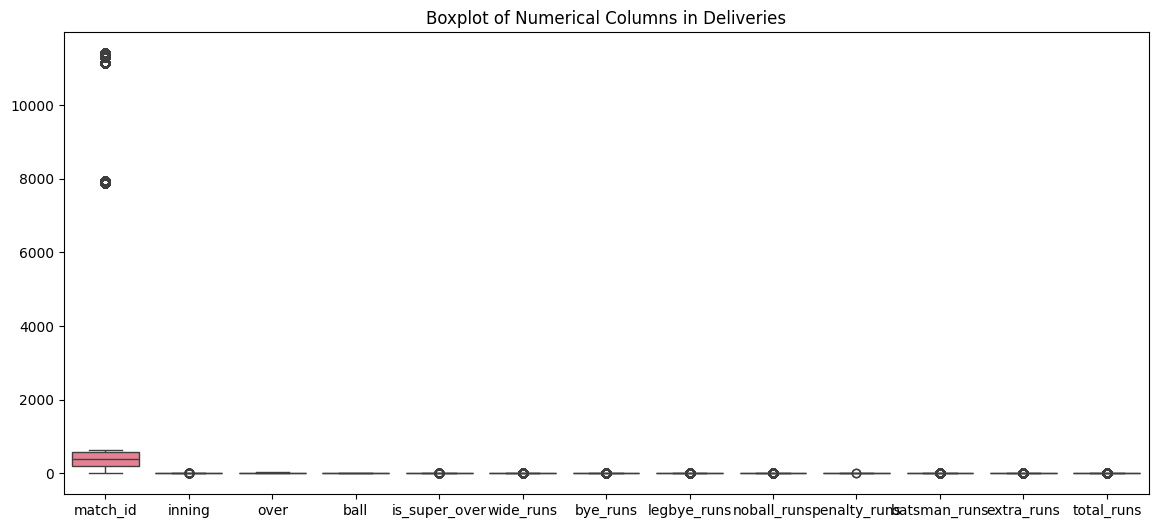

In [20]:
# Boxplot for numerical columns in deliveries
plt.figure(figsize=(14, 6))
sns.boxplot(data=deliveries.select_dtypes(include=[np.number]))
plt.title('Boxplot of Numerical Columns in Deliveries')
plt.show()

## 2. RELATIONSHIPS AND PATTERNS
### 2.1 HEATMAP CORRELATION

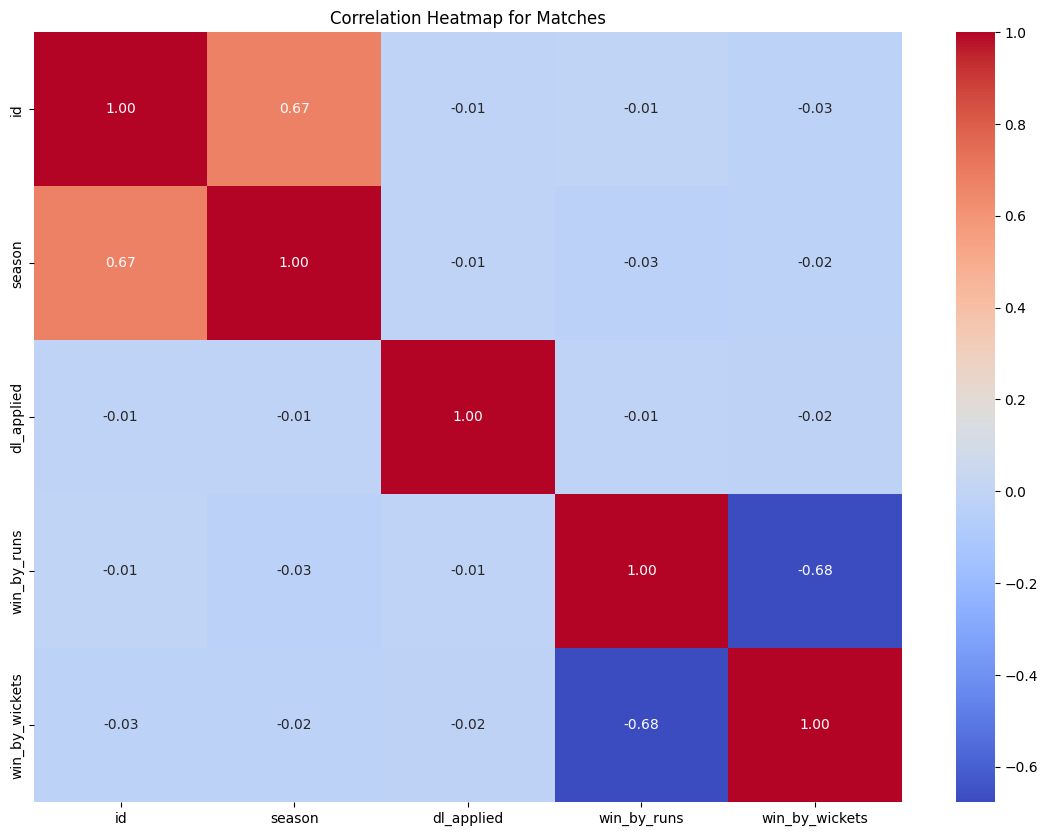

In [21]:
# Filter numeric columns for matches
numeric_cols_matches = matches.select_dtypes(include=[np.number])

# Correlation heatmap for matches
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_cols_matches.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Matches')
plt.show()

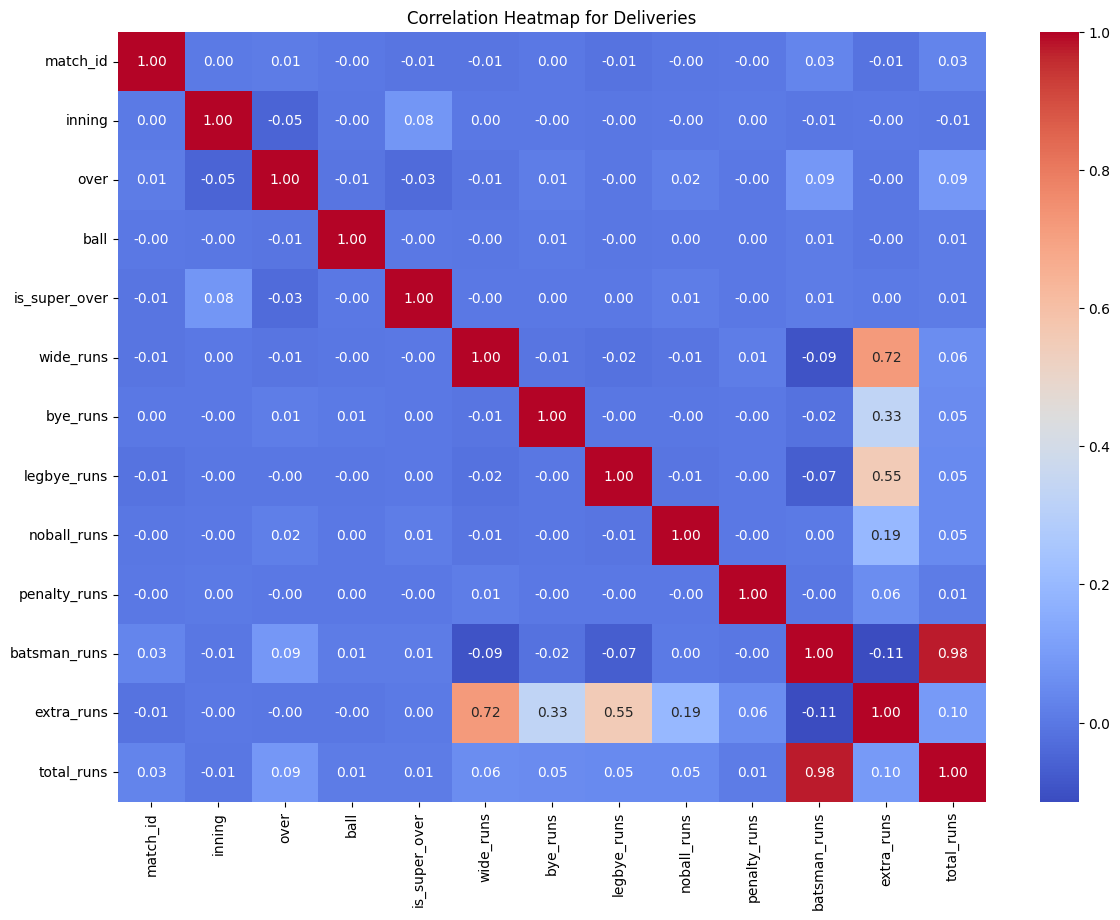

In [22]:
# Filter numeric columns for deliveries
numeric_cols_deliveries = deliveries.select_dtypes(include=[np.number])

# Correlation heatmap for deliveries
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_cols_deliveries.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Deliveries')
plt.show()

## 2.2 PAIR PLOT

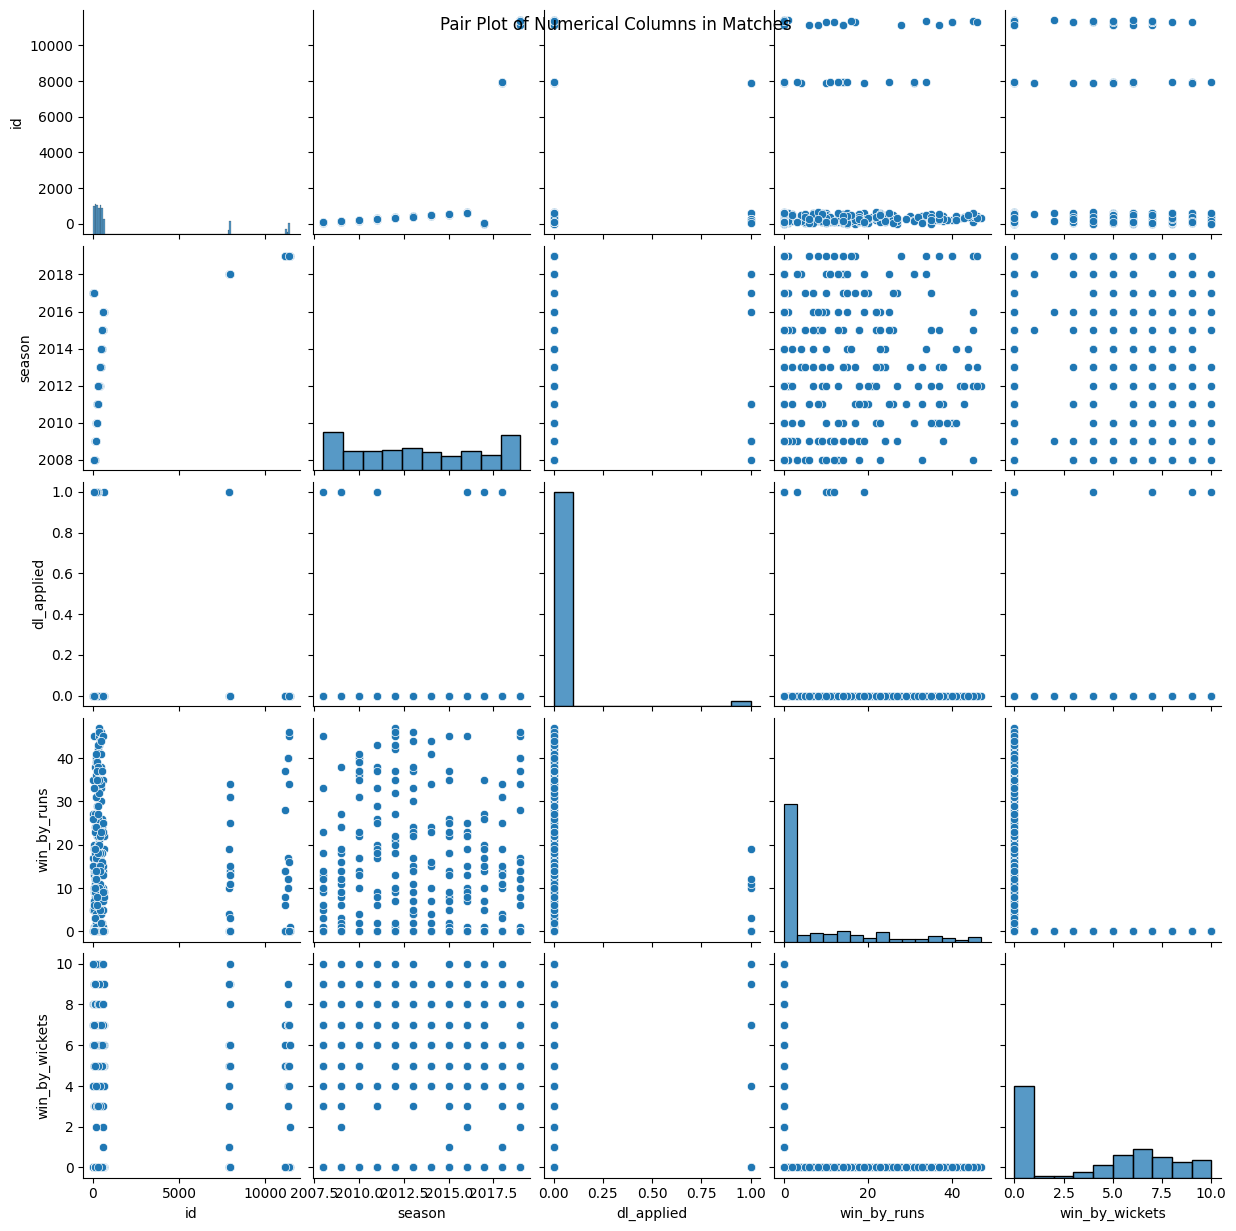

In [23]:
# Pair plot for numerical columns in matches
sns.pairplot(matches.select_dtypes(include=[np.number]).sample(500))
plt.suptitle('Pair Plot of Numerical Columns in Matches')
plt.show()

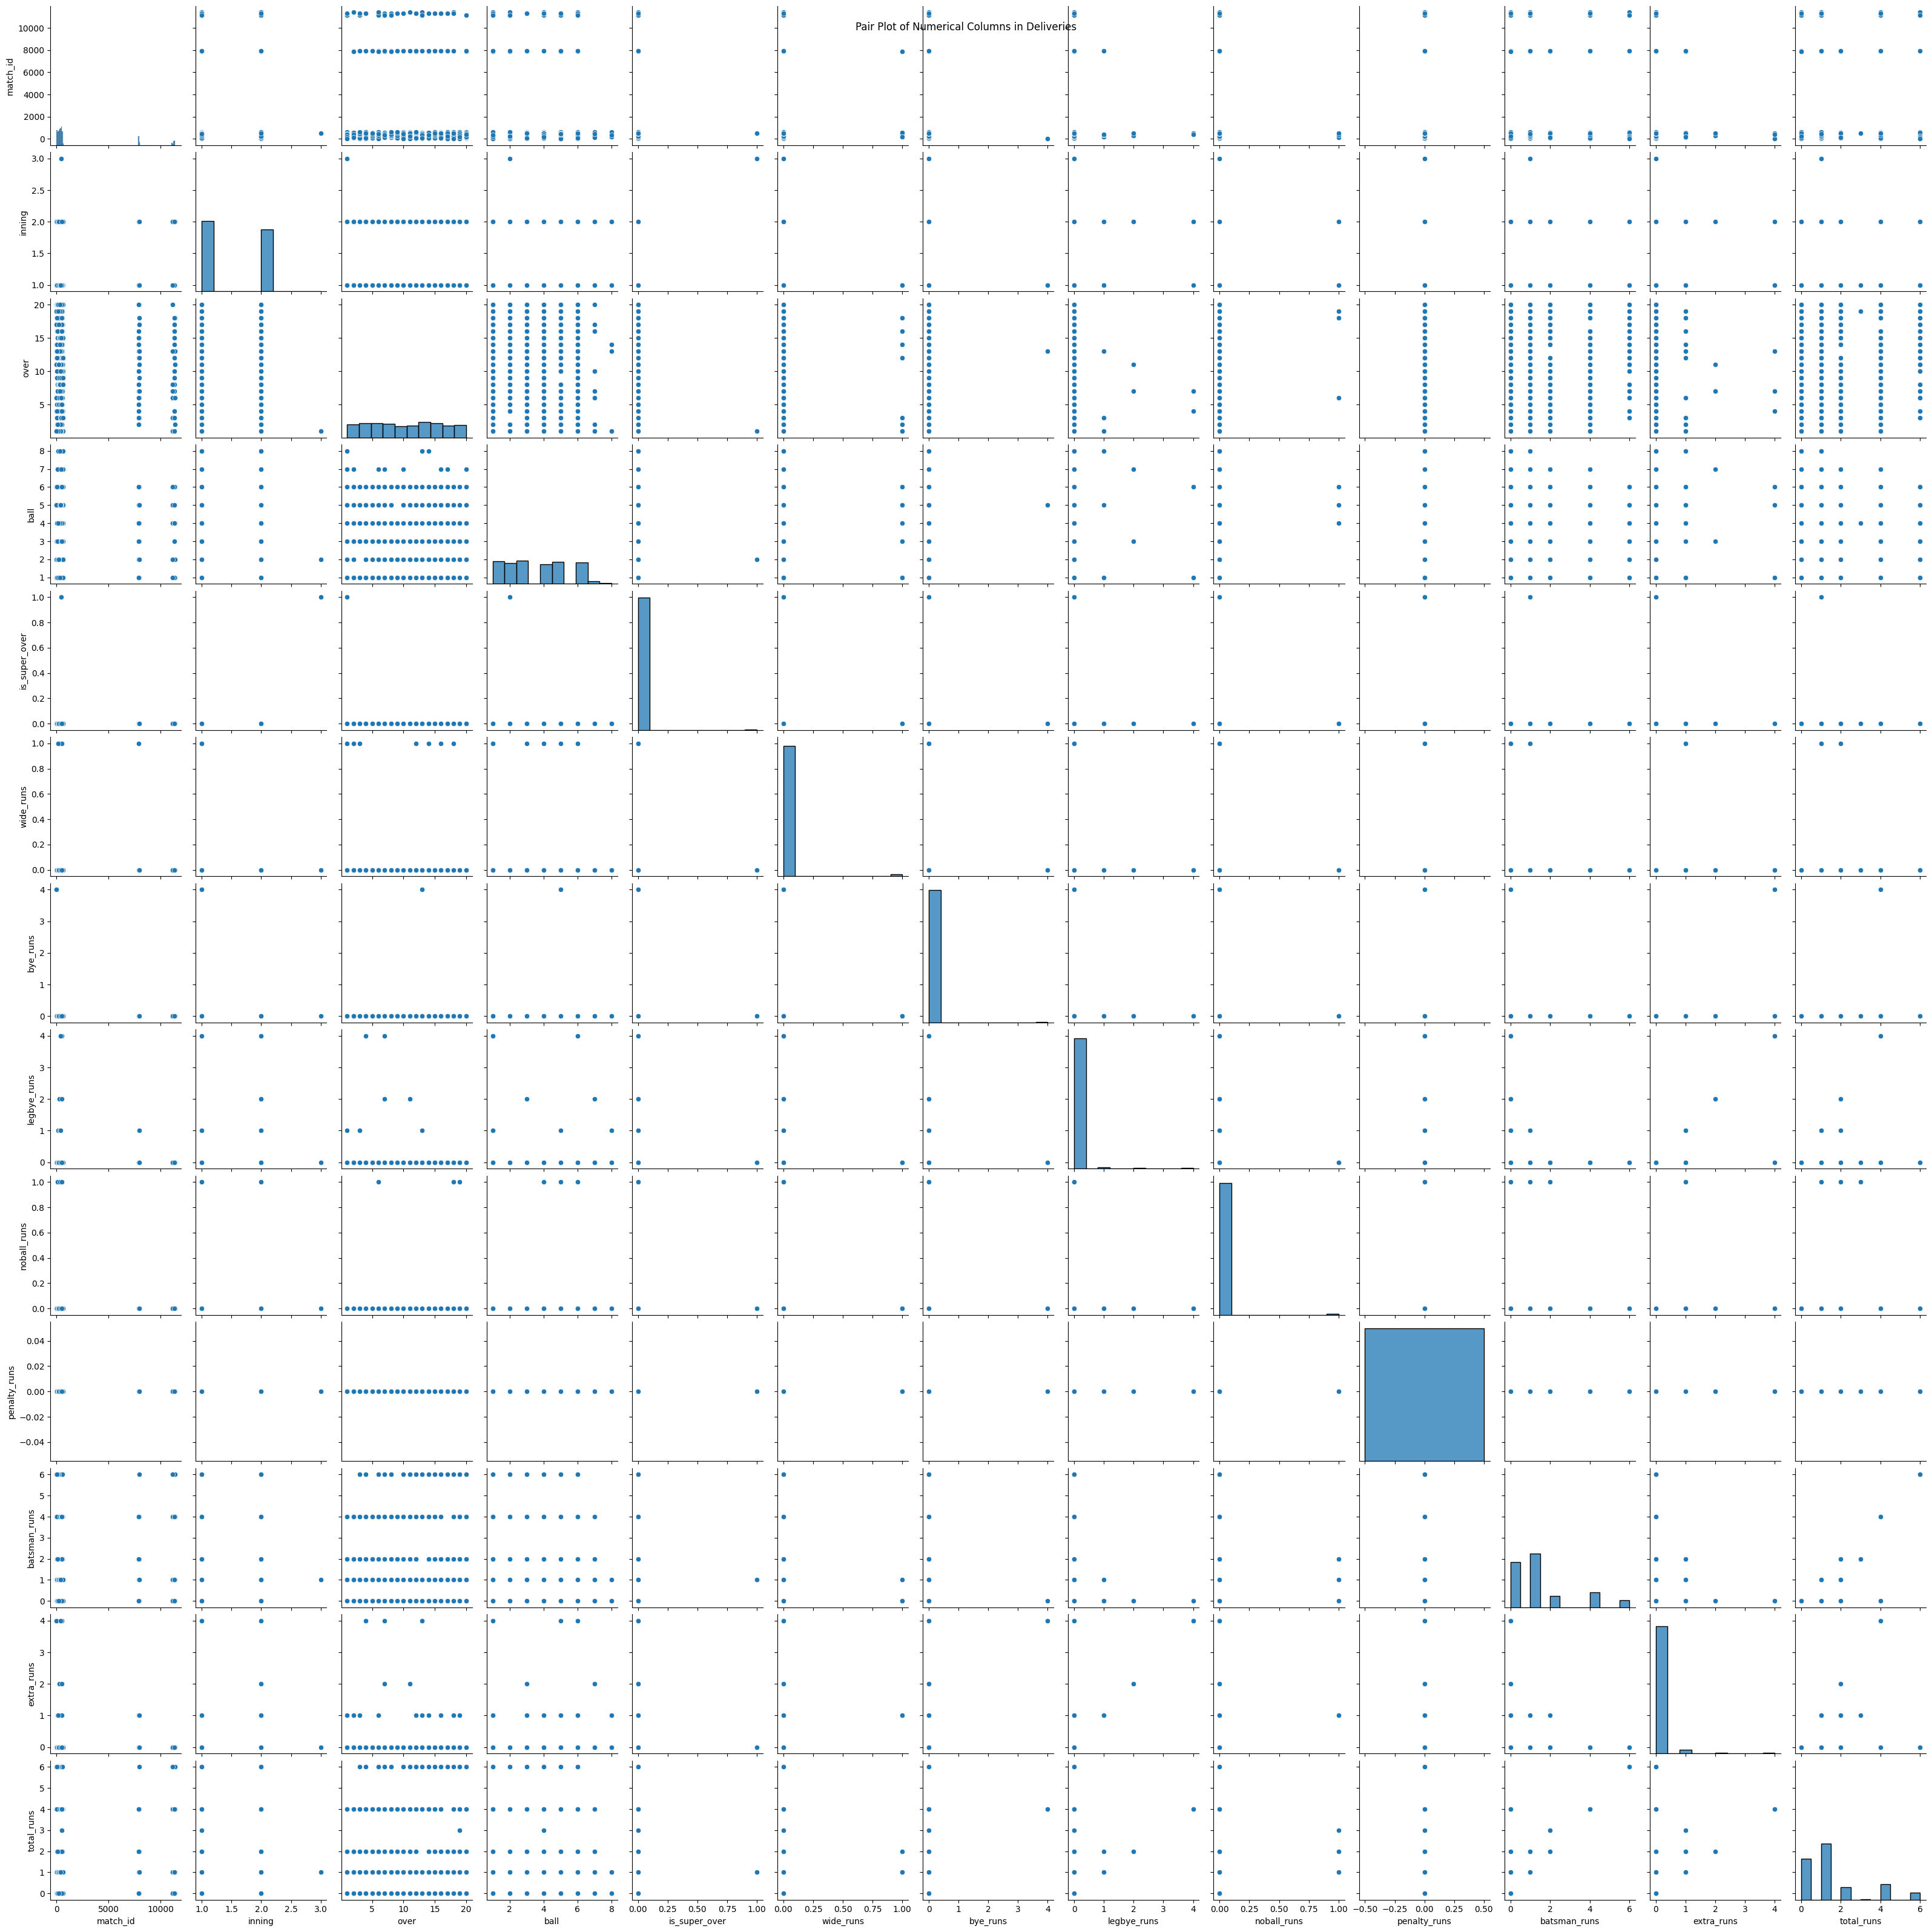

In [24]:
# Pair plot for numerical columns in deliveries
sns.pairplot(deliveries.select_dtypes(include=[np.number]).sample(500))
plt.suptitle('Pair Plot of Numerical Columns in Deliveries')
plt.show()

## 3. CATEGORICAL DATA INSIGHTS
### 3.1 BARPLOT

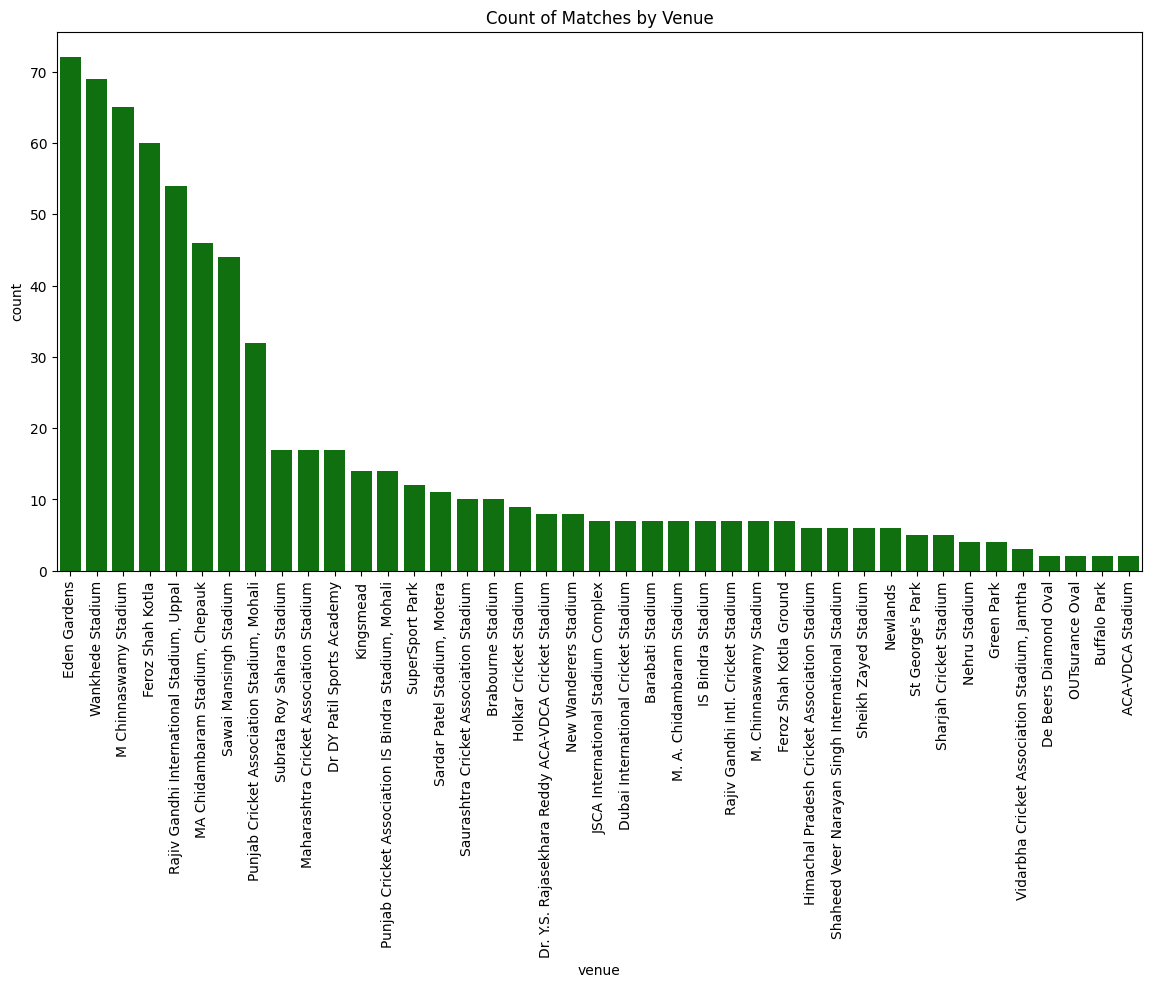

In [25]:
# Bar plot for a categorical column in matches
plt.figure(figsize=(14, 7))
sns.countplot(x='venue', data=matches, color='g', order=matches['venue'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count of Matches by Venue')
plt.show()

### 3.2. PIE DIAGRAM

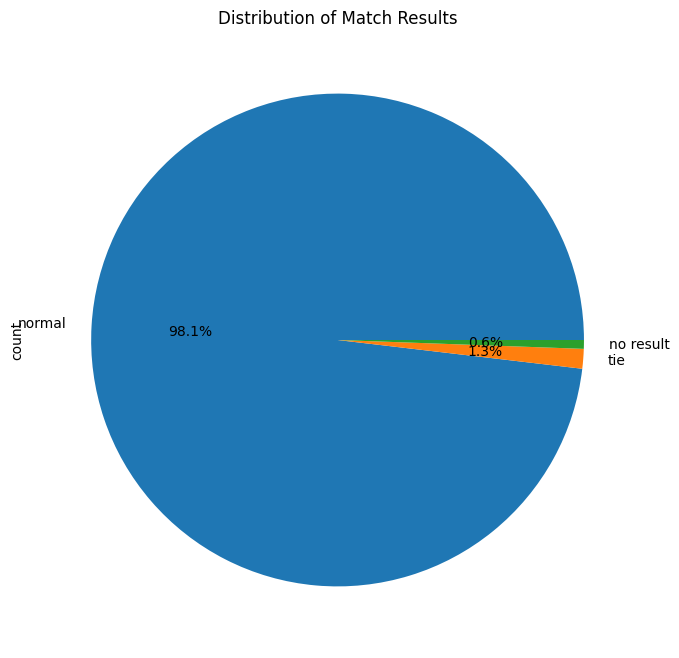

In [26]:
# Pie chart for a categorical column in matches
matches['result'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8), title='Distribution of Match Results')
plt.show()

### 3.3. COUNT PLOT

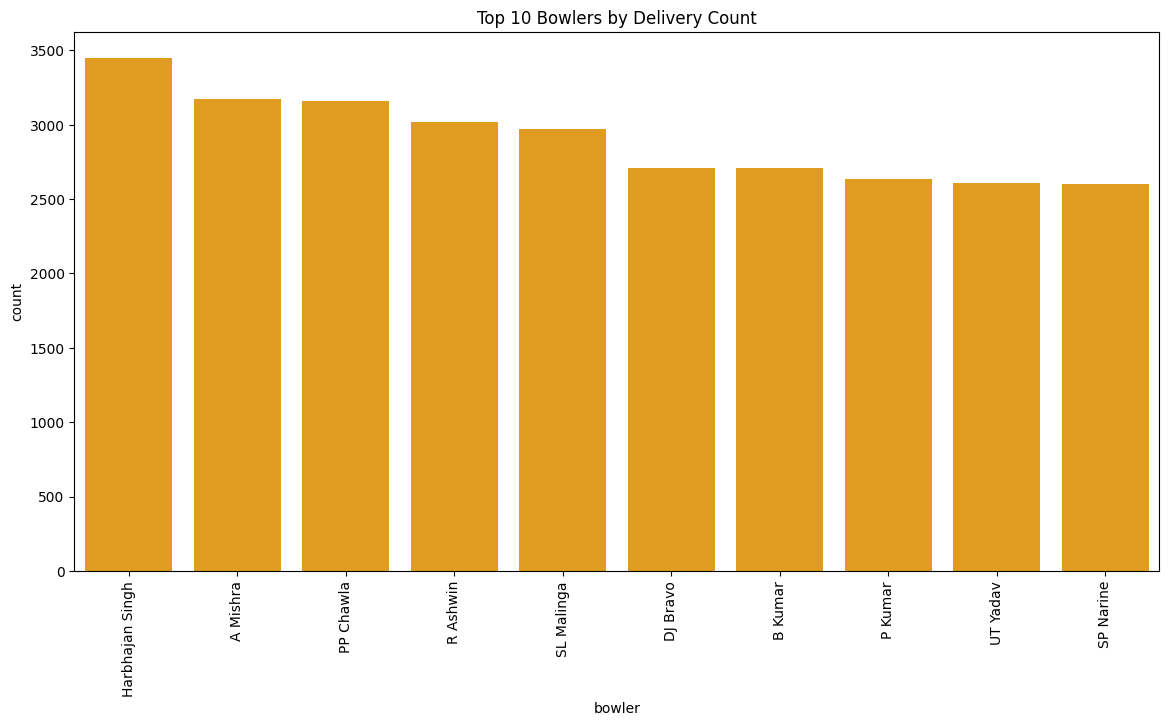

In [27]:
# Count plot for a categorical column in deliveries
plt.figure(figsize=(14, 7))
sns.countplot(x='bowler', color= 'orange', data=deliveries, order=deliveries['bowler'].value_counts().head(10).index)
plt.xticks(rotation=90)
plt.title('Top 10 Bowlers by Delivery Count')
plt.show()

## 4. TREND ANALYSIS:
### 4.1. KERNEL DENSITY ESTIMATION [KDE]

In [28]:
# Inspecting columns
print(matches.columns)

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')


In [30]:
import warnings
warnings.filterwarnings("ignore")

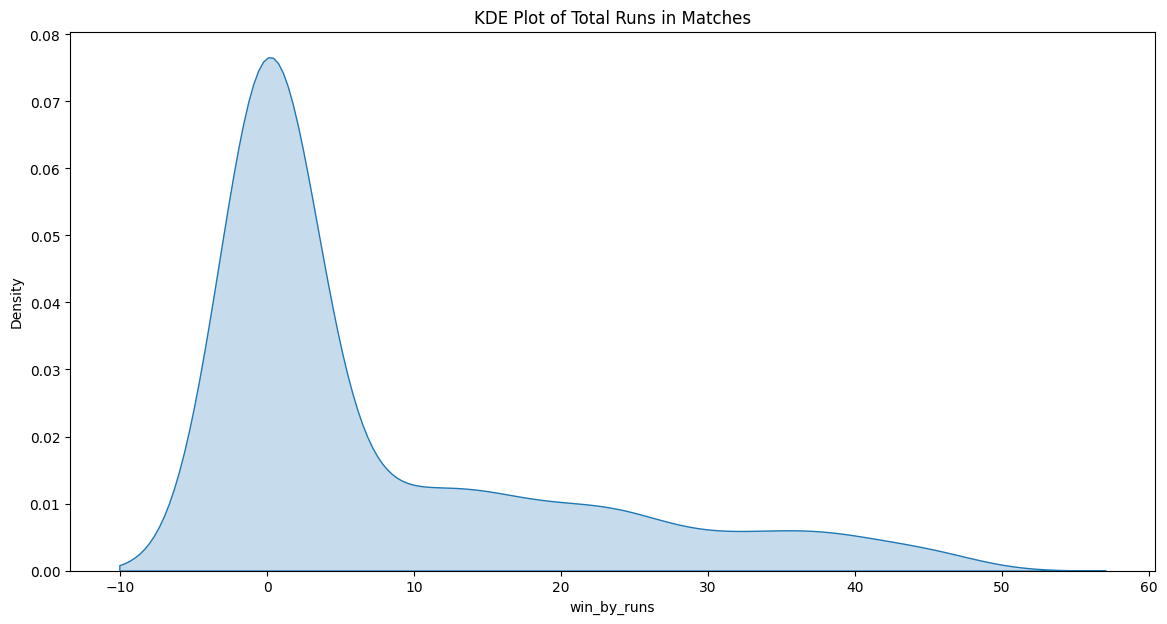

In [31]:
# KDE plot for numerical columns in matches
plt.figure(figsize=(14, 7))
sns.kdeplot(matches['win_by_runs'], shade=True)
plt.title('KDE Plot of Total Runs in Matches')
plt.show()

### WIN ANS LOSS ANALYSIS

In [32]:
winloss = matches[['team1','team2','winner']]
winloss.head()

winloss['loser'] = winloss.apply(lambda x: x['team2'] if x['team1']== x['winner'] else x['team1'], axis = 1)
winloss.head()

,team1,team2,winner,loser
0,SRH,RCB,SRH,RCB
1,MI,RPS,RPS,MI
2,GL,KKR,KKR,GL
3,RPS,KXIP,KXIP,RPS
4,RCB,DC,RCB,DC


### NUMBER OF WINS PER TEAM

In [33]:
teamwins = winloss['winner'].value_counts()
teamwins

winner
MI      99
KKR     88
CSK     86
SRH     81
RCB     77
KXIP    76
DC      73
RR      69
RPS     14
GL      13
PW      12
KTK      6
Name: count, dtype: int64

### CITY WISE ANALYSIS

In [34]:
# Which city hosted the most number of matches
city = matches['city'].value_counts()
city

city
Mumbai            96
Kolkata           72
Delhi             67
Hyderabad         61
Bangalore         58
Chennai           53
Jaipur            44
Chandigarh        43
Pune              34
Durban            14
Bengaluru         14
Centurion         12
Ahmedabad         11
Rajkot            10
Mohali            10
Visakhapatnam     10
Indore             9
Johannesburg       8
Cuttack            7
Ranchi             7
Raipur             6
Cape Town          6
Abu Dhabi          6
Dharamsala         6
Port Elizabeth     5
Sharjah            5
Kanpur             4
Kochi              4
Nagpur             3
Bloemfontein       2
Kimberley          2
East London        2
Name: count, dtype: int64

### ANALYSING TOSS

In [35]:
# Teams with maximum number of toss wins
tosswins = matches['toss_winner'].value_counts()
tosswins

toss_winner
MI      89
KKR     88
SRH     85
CSK     81
DC      80
KXIP    75
RR      75
RCB     73
PW      19
GL      14
RPS     12
KTK      7
Name: count, dtype: int64

### MOST NUMBER OF BOUNDARIES

In [36]:
fours = deliveries[deliveries['batsman_runs']==4]
fours.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
13,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
30,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,5,5,MC Henriques,S Dhawan,S Aravind,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
32,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,6,1,S Dhawan,MC Henriques,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [37]:
four = fours.groupby('batsman')['batsman_runs'].count()
four = four.sort_values(ascending=False)
four

batsman
S Dhawan          526
SK Raina          495
G Gambhir         492
V Kohli           482
DA Warner         459
                 ... 
Sandeep Sharma      1
S Mavi              1
Shivam Sharma       1
NS Naik             1
J Theron            1
Name: batsman_runs, Length: 410, dtype: int64

# 7. FEATURE ENGINEERING
Feature engineering is an essential part of preparing data for machine learning models. Categorical features often need to be encoded into numerical representations so that models can process them. Below is the code that identifies and encodes categorical features using both one-hot encoding and label encoding.

In [3]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [4]:
# Identify categorical columns
categorical_cols_matches = matches.select_dtypes(include=['object']).columns
categorical_cols_deliveries = deliveries.select_dtypes(include=['object']).columns

# Initialize Label Encoder
label_encoders = {}

# Apply Label Encoding to categorical columns in matches
for col in categorical_cols_matches:
    label_encoders[col] = LabelEncoder()
    matches[col] = label_encoders[col].fit_transform(matches[col])

# Apply Label Encoding to categorical columns in deliveries
for col in categorical_cols_deliveries:
    label_encoders[col] = LabelEncoder()
    deliveries[col] = label_encoders[col].fit_transform(deliveries[col])

# One-Hot Encoding for categorical columns
# Matches One-Hot Encoding
matches_onehot = pd.get_dummies(matches, columns=categorical_cols_matches, drop_first=True)

# Deliveries One-Hot Encoding
deliveries_onehot = pd.get_dummies(deliveries, columns=categorical_cols_deliveries, drop_first=True)

# Display the first few rows of the transformed data
print("Matches after One-Hot Encoding:")
print(matches_onehot.head())

print("\nDeliveries after One-Hot Encoding:")
print(deliveries_onehot.head())

Matches after One-Hot Encoding:
   id  season  dl_applied  win_by_runs  win_by_wickets  city_1  city_2  \
0   1    2017           0           35               0   False   False   
1   2    2017           0            0               7   False   False   
2   3    2017           0            0              10   False   False   
3   4    2017           0            0               6   False   False   
4   5    2017           0           15               0   False    True   

   city_3  city_4  city_5  ...  umpire3_16  umpire3_17  umpire3_18  \
0   False   False   False  ...       False       False       False   
1   False   False   False  ...       False       False       False   
2   False   False   False  ...       False       False       False   
3   False   False   False  ...       False       False       False   
4   False   False   False  ...       False       False       False   

   umpire3_19  umpire3_20  umpire3_21  umpire3_22  umpire3_23  umpire3_24  \
0       False       False

# 8. FEATURE SELECTION:
Feature selection is the process of identifying and selecting a subset of relevant features (variables, predictors) from the entire set of features in a dataset, which are most useful for a given machine learning model or task. 
The goal of feature selection is to improve the performance of the model by reducing overfitting, enhancing model interpretability, and decreasing training time.

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif

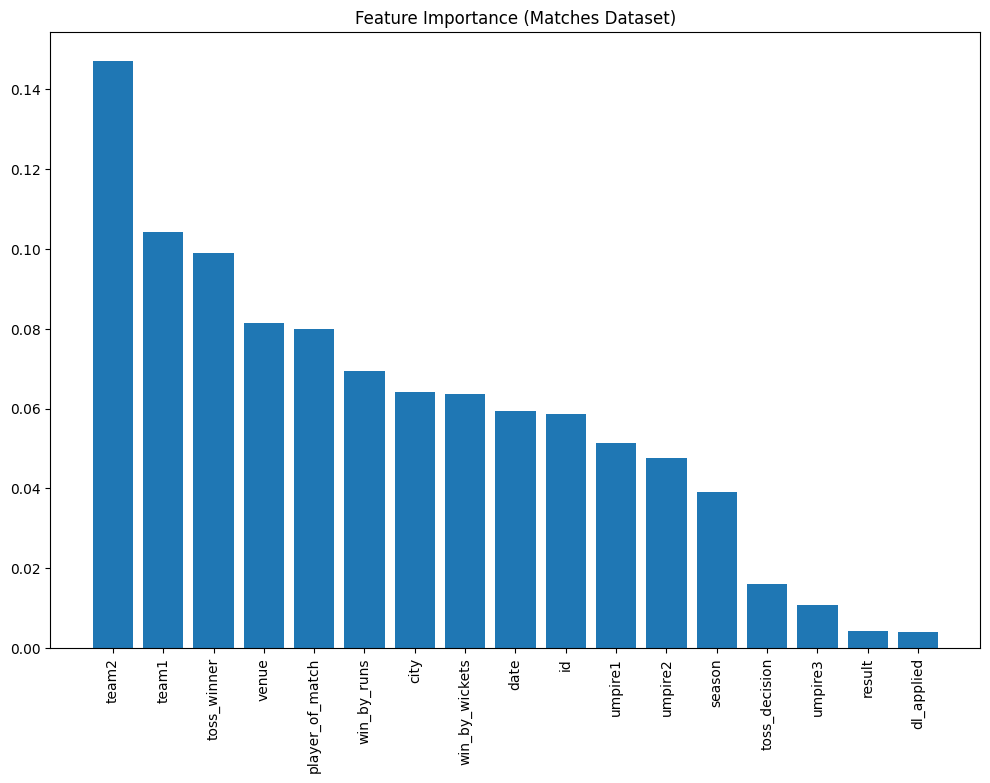

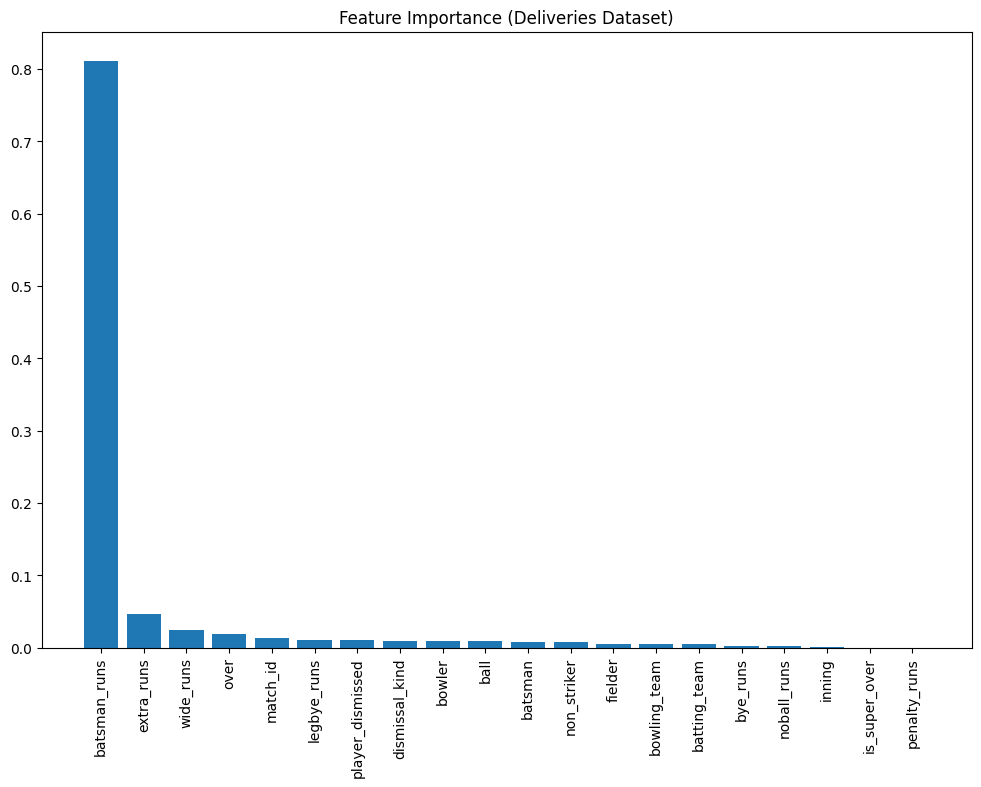

Top 10 Selected Features (Matches Dataset):
Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'result', 'player_of_match', 'venue'],
      dtype='object')
Top 10 Selected Features (Deliveries Dataset):
Index(['over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'batsman_runs', 'extra_runs', 'player_dismissed', 'dismissal_kind',
       'fielder'],
      dtype='object')


In [6]:
# Define X (features) and y (target) for both datasets
# Assuming 'winner' is the target variable in matches and 'total_runs' in deliveries

X_matches = matches.drop(columns=['winner'])  # Drop the target column
y_matches = matches['winner']

X_deliveries = deliveries.drop(columns=['total_runs'])  # Drop the target column
y_deliveries = deliveries['total_runs']

# Feature Importance using Random Forest (for Matches)
rf_matches = RandomForestClassifier(n_estimators=100, random_state=42)
rf_matches.fit(X_matches, y_matches)

# Get feature importance
importance_matches = rf_matches.feature_importances_

# Plot feature importance
plt.figure(figsize=(12, 8))
indices = np.argsort(importance_matches)[::-1]
plt.title("Feature Importance (Matches Dataset)")
plt.bar(range(X_matches.shape[1]), importance_matches[indices])
plt.xticks(range(X_matches.shape[1]), X_matches.columns[indices], rotation=90)
plt.show()

# Feature Importance using Random Forest (for Deliveries)
rf_deliveries = RandomForestClassifier(n_estimators=100, random_state=42)
rf_deliveries.fit(X_deliveries, y_deliveries)

# Get feature importance
importance_deliveries = rf_deliveries.feature_importances_

# Plot feature importance
plt.figure(figsize=(12, 8))
indices = np.argsort(importance_deliveries)[::-1]
plt.title("Feature Importance (Deliveries Dataset)")
plt.bar(range(X_deliveries.shape[1]), importance_deliveries[indices])
plt.xticks(range(X_deliveries.shape[1]), X_deliveries.columns[indices], rotation=90)
plt.show()

# Feature Selection using SelectKBest (for Matches)
k_best_matches = SelectKBest(score_func=f_classif, k=10)
k_best_matches.fit(X_matches, y_matches)

# Get selected features
selected_features_matches = X_matches.columns[k_best_matches.get_support()]

print("Top 10 Selected Features (Matches Dataset):")
print(selected_features_matches)

# Feature Selection using SelectKBest (for Deliveries)
k_best_deliveries = SelectKBest(score_func=f_classif, k=10)
k_best_deliveries.fit(X_deliveries, y_deliveries)

# Get selected features
selected_features_deliveries = X_deliveries.columns[k_best_deliveries.get_support()]

print("Top 10 Selected Features (Deliveries Dataset):")
print(selected_features_deliveries)

# 9. SPLIT DATA INTO TRAINING AND TESTING SETS:

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Splitting Matches dataset into Training and Testing sets
X_train_matches, X_test_matches, y_train_matches, y_test_matches = train_test_split(
    X_matches, y_matches, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("Matches Dataset:")
print(f"X_train_matches shape: {X_train_matches.shape}")
print(f"X_test_matches shape: {X_test_matches.shape}")
print(f"y_train_matches shape: {y_train_matches.shape}")
print(f"y_test_matches shape: {y_test_matches.shape}")


# Splitting Deliveries dataset into Training and Testing sets
X_train_deliveries, X_test_deliveries, y_train_deliveries, y_test_deliveries = train_test_split(
    X_deliveries, y_deliveries, test_size=0.3, random_state=42)

print("\nDeliveries Dataset:")
print(f"X_train_deliveries shape: {X_train_deliveries.shape}")
print(f"X_test_deliveries shape: {X_test_deliveries.shape}")
print(f"y_train_deliveries shape: {y_train_deliveries.shape}")
print(f"y_test_deliveries shape: {y_test_deliveries.shape}")

Matches Dataset:
X_train_matches shape: (529, 17)
X_test_matches shape: (227, 17)
y_train_matches shape: (529,)
y_test_matches shape: (227,)

Deliveries Dataset:
X_train_deliveries shape: (125354, 20)
X_test_deliveries shape: (53724, 20)
y_train_deliveries shape: (125354,)
y_test_deliveries shape: (53724,)


# 10. FEATURE SCALING:
Feature scaling is an essential step in data preprocessing, especially when using algorithms that rely on the magnitude of numerical features, such as gradient descent-based methods. 
Two common scaling techniques are Standardization (z-score normalization) and Min-Max scaling.

1. Standardization:
Standardization scales the data so that it has a mean of 0 and a standard deviation of 1.

2. Min-Max Scaling:
Min-Max Scaling scales the data to a fixed range, typically [0, 1].

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [10]:
# Option 1: Standardization (z-score normalization)

scaler = StandardScaler()

# Scaling Matches Dataset
X_train_matches_scaled = scaler.fit_transform(X_train_matches)
X_test_matches_scaled = scaler.transform(X_test_matches)

# Scaling Deliveries Dataset
X_train_deliveries_scaled = scaler.fit_transform(X_train_deliveries)
X_test_deliveries_scaled = scaler.transform(X_test_deliveries)

# Display the scaled data (just a few rows to verify)
print("Standardized Matches Dataset (first 5 rows of training set):")
print(pd.DataFrame(X_train_matches_scaled, columns=X_train_matches.columns).head())

print("\nStandardized Deliveries Dataset (first 5 rows of training set):")
print(pd.DataFrame(X_train_deliveries_scaled, columns=X_train_deliveries.columns).head())

Standardized Matches Dataset (first 5 rows of training set):
         id    season      city      date     team1     team2  toss_winner  \
0 -0.501928 -1.061435 -0.574123 -0.781379  0.233827 -0.951961    -0.909973   
1 -0.394558  0.409999  0.749499  0.965844  0.233827 -1.642438    -1.607620   
2 -0.442642 -0.178575 -0.935111  0.185034 -0.450830 -0.031326     0.020222   
3 -0.392373  0.704285 -0.092806  1.017045  1.603142 -0.031326     1.648063   
4 -0.490726 -1.061435 -0.814782 -0.595777 -1.591925 -0.951961    -1.607620   

   toss_decision    result  dl_applied  win_by_runs  win_by_wickets  \
0       0.773426 -0.055079   -0.158726     3.452364       -1.000798   
1       0.773426 -0.055079   -0.158726     1.128826       -1.000798   
2       0.773426 -0.055079   -0.158726    -0.379435       -1.000798   
3      -1.292949 -0.055079   -0.158726    -0.542490        1.356117   
4      -1.292949 -0.055079   -0.158726    -0.542490        0.766889   

   player_of_match     venue   umpire1   um

In [46]:
# Option 2: Min-Max Scaling

min_max_scaler = MinMaxScaler()

# Scaling Matches Dataset with Min-Max Scaling
X_train_matches_minmax = min_max_scaler.fit_transform(X_train_matches)
X_test_matches_minmax = min_max_scaler.transform(X_test_matches)

# Scaling Deliveries Dataset with Min-Max Scaling
X_train_deliveries_minmax = min_max_scaler.fit_transform(X_train_deliveries)
X_test_deliveries_minmax = min_max_scaler.transform(X_test_deliveries)

print("\nMin-Max Scaled Matches Dataset (first 5 rows of training set):")
print(pd.DataFrame(X_train_matches_minmax, columns=X_train_matches.columns).head())

print("\nMin-Max Scaled Deliveries Dataset (first 5 rows of training set):")
print(pd.DataFrame(X_train_deliveries_minmax, columns=X_train_deliveries.columns).head())


Min-Max Scaled Matches Dataset (first 5 rows of training set):
         id    season     city      date     team1     team2  toss_winner  \
0  0.034081  0.454545  0.71875  0.531915  0.545455  0.090909     0.545455   
1  0.976257  1.000000  0.43750  0.988395  0.909091  1.000000     0.909091   
2  0.028123  0.363636  0.65625  0.441006  0.909091  0.272727     0.909091   
3  0.040477  0.545455  1.00000  0.618956  0.272727  0.090909     0.272727   
4  0.017084  0.181818  0.21875  0.284333  0.272727  0.454545     0.272727   

   toss_decision  result  dl_applied  win_by_runs  win_by_wickets  \
0            0.0     0.5         0.0     0.936170             0.0   
1            0.0     0.5         0.0     0.000000             0.5   
2            0.0     0.5         0.0     0.000000             0.5   
3            0.0     0.5         0.0     0.000000             0.4   
4            0.0     0.5         0.0     0.829787             0.0   

   player_of_match  venue   umpire1   umpire2  umpire3  
0

# 11. BUILD THE ML MODEL & MODEL EVALUATION:

In [11]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.neighbors import KNeighborsClassifier

##### Classification models -are a subset of supervised learning models used to predict categorical outcomes.

In [12]:
classification_models = {'Logistic Regression': LogisticRegression(max_iter=1000),
                         'Support Vector Machine (SVM)': SVC(),
                         'Decision Tree': DecisionTreeClassifier(),
                         'MLP Classifier': MLPClassifier(max_iter=1000),
                         'Naive Bayes': GaussianNB(),
                         'Random Forest': RandomForestClassifier(),
                         'K-Nearest Neighbors': KNeighborsClassifier(),
                         'Gradient Boosting': GradientBoostingClassifier(),
                         'AdaBoost': AdaBoostClassifier()}

# Train and evaluate classification models on the matches dataset
print("\nClassification Models on Matches Dataset:")
for model_name, model in classification_models.items():
    model.fit(X_train_matches_scaled, y_train_matches)
    y_pred = model.predict(X_test_matches_scaled)
    print(f"\n{model_name}:")
    print(classification_report(y_test_matches, y_pred))
    print(confusion_matrix(y_test_matches, y_pred))


Classification Models on Matches Dataset:

Logistic Regression:
              precision    recall  f1-score   support

           0       0.42      0.37      0.39        38
           1       0.14      0.30      0.19        10
           2       0.00      0.00      0.00         1
           3       0.17      0.18      0.17        17
           4       0.67      0.29      0.40         7
           5       0.12      0.16      0.14        19
           6       0.00      0.00      0.00         1
           7       0.40      0.21      0.28        38
           8       0.26      0.39      0.31        28
           9       0.00      0.00      0.00         5
          10       0.30      0.27      0.29        22
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         5
          13       0.19      0.22      0.21        18
          14       0.24      0.36      0.29        14
          15       1.00      1.00      1.00         1

    accuracy   

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,


MLP Classifier:
              precision    recall  f1-score   support

           0       0.78      0.55      0.65        38
           1       0.30      0.30      0.30        10
           2       0.33      1.00      0.50         1
           3       0.33      0.47      0.39        17
           4       0.60      0.43      0.50         7
           5       0.31      0.42      0.36        19
           6       0.00      0.00      0.00         1
           7       0.44      0.29      0.35        38
           8       0.37      0.68      0.48        28
           9       0.00      0.00      0.00         5
          10       0.50      0.36      0.42        22
          11       0.50      0.67      0.57         3
          12       0.00      0.00      0.00         5
          13       0.53      0.44      0.48        18
          14       0.57      0.57      0.57        14
          15       1.00      1.00      1.00         1

    accuracy                           0.44       227
   macro 

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,


K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.51      0.66      0.57        38
           1       0.22      0.20      0.21        10
           2       0.00      0.00      0.00         1
           3       0.09      0.18      0.12        17
           4       0.00      0.00      0.00         7
           5       0.21      0.32      0.25        19
           6       0.00      0.00      0.00         1
           7       0.48      0.26      0.34        38
           8       0.38      0.54      0.45        28
           9       0.00      0.00      0.00         5
          10       0.31      0.23      0.26        22
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         5
          13       0.31      0.28      0.29        18
          14       0.38      0.36      0.37        14
          15       1.00      1.00      1.00         1

    accuracy                           0.34       227
   m

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,


Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      1.00      1.00        10
           2       0.00      0.00      0.00         1
           3       0.89      1.00      0.94        17
           4       0.86      0.86      0.86         7
           5       0.90      1.00      0.95        19
           6       0.00      0.00      0.00         1
           7       0.97      0.92      0.95        38
           8       1.00      0.89      0.94        28
           9       1.00      0.40      0.57         5
          10       0.79      1.00      0.88        22
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         5
          13       0.82      1.00      0.90        18
          14       0.88      1.00      0.93        14
          15       1.00      1.00      1.00         1

    accuracy                           0.91       227
   mac

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,


AdaBoost:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        38
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        17
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        19
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        38
           8       0.12      0.96      0.22        28
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00        22
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00        18
          14       0.00      0.00      0.00        14
          15       1.00      1.00      1.00         1

    accuracy                           0.12       227
   macro avg   

C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

# 12 HYPERPARAMETER TUNING

In [29]:
#1 Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV to the matches training data
grid_search_rf.fit(X_train_matches_scaled, y_train_matches)

# Best parameters and estimator
print("\nBest Parameters (Random Forest - Matches Dataset):")
print(grid_search_rf.best_params_)
print("Best Estimator:")
print(grid_search_rf.best_estimator_)

# Evaluate the best model on the test set
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_matches_scaled)
print("\nEvaluation of Best Random Forest Model:")
print(classification_report(y_test_matches, y_pred_best_rf))
print(confusion_matrix(y_test_matches, y_pred_best_rf))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best Parameters (Random Forest - Matches Dataset):
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best Estimator:
RandomForestClassifier(bootstrap=False, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300, random_state=42)

Evaluation of Best Random Forest Model:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        38
           1       0.67      0.40      0.50        10
           2       1.00      1.00      1.00         1
           3       0.72      0.76      0.74        17
           4       1.00      0.43      0.60         7
           5       0.52      0.58      0.55        19
           6       0.00      0.00      0.00         1
           7       0.78      0.74      0.76        38
           8       0.59      0.79      0.68        28
           9       0.00      0.00      

In [28]:
#2 Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(SVC(random_state=42),
                               param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV to the matches training data
grid_search_svm.fit(X_train_matches_scaled, y_train_matches)

# Best parameters and estimator
print("\nBest Parameters (SVM - Matches Dataset):")
print(grid_search_svm.best_params_)
print("Best Estimator:")
print(grid_search_svm.best_estimator_)

# Evaluate the best model on the test set
best_svm = grid_search_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test_matches_scaled)
print("\nEvaluation of Best SVM Model:")
print(classification_report(y_test_matches, y_pred_best_svm))
print(confusion_matrix(y_test_matches, y_pred_best_svm))

Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best Parameters (SVM - Matches Dataset):
{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Estimator:
SVC(C=100, gamma=0.01, random_state=42)

Evaluation of Best SVM Model:
              precision    recall  f1-score   support

           0       0.78      0.55      0.65        38
           1       0.15      0.30      0.20        10
           2       0.00      0.00      0.00         1
           3       0.29      0.47      0.36        17
           4       0.60      0.43      0.50         7
           5       0.25      0.32      0.28        19
           6       0.00      0.00      0.00         1
           7       0.48      0.32      0.38        38
           8       0.41      0.61      0.49        28
           9       0.00      0.00      0.00         5
          10       0.67      0.36      0.47        22
          11       0.50      0.33      0.40         3
          12       0.00      0.00      0.00         5
         

In [ ]:
#3  Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42),
                              param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV to the matches training data
grid_search_gb.fit(X_train_matches_scaled, y_train_matches)

# Best parameters and estimator
print("\nBest Parameters (Gradient Boosting - Matches Dataset):")
print(grid_search_gb.best_params_)
print("Best Estimator:")
print(grid_search_gb.best_estimator_)

# Evaluate the best model on the test set
best_gb = grid_search_gb.best_estimator_
y_pred_best_gb = best_gb.predict(X_test_matches_scaled)
print("\nEvaluation of Best Gradient Boosting Model:")
print(classification_report(y_test_matches, y_pred_best_gb))
print(confusion_matrix(y_test_matches, y_pred_best_gb))

# INTERPRETATION AND RESULTS

#### Model Performance Analysis
Best Hyperparameters: The grid search has identified the optimal hyperparameters for the RandomForestClassifier. These parameters should ideally balance the model’s complexity and its ability to generalize to unseen data.

n_estimators: A higher number generally improves model performance but increases computation time.

max_depth: Controls the maximum depth of each tree. Deeper trees can capture more information but may also overfit.

min_samples_split and min_samples_leaf: These parameters control the minimum number of samples required to split a node or be at a leaf node. Higher values prevent overfitting but may lead to underfitting.

bootstrap: Whether or not bootstrap samples are used when building trees. Using bootstrap samples can increase the diversity of trees, improving generalization.

Classification Report: This provides insights into the model's precision, recall, f1-score, and overall accuracy for each class:

##### 1.Precision measures the proportion of positive identifications that were actually correct.
##### 2.Recall measures the proportion of actual positives that were correctly identified.
##### 3.F1-score is the harmonic mean of precision and recall, offering a balance between them.
##### 4.Accuracy indicates the overall proportion of correct predictions.

Conclusion: If the metrics are high, the model is performing well in identifying both classes with high accuracy. If there are disparities between classes, the model may be biased toward certain classes or might struggle with imbalanced data.

Confusion Matrix: Provides a detailed view of misclassifications:

True Positives (TP): Correct predictions for each class.
False Positives (FP): Incorrect predictions where the model predicted a class, but the actual class was different.
False Negatives (FN): Incorrect predictions where the model missed a class.
True Negatives (TN): Correct rejections of other classes.

Conclusion: A well-balanced confusion matrix with high TP and low FP/FN values across classes indicates a robust model. If certain classes have many misclassifications, this might suggest that more data or feature engineering is needed for those classes.

Limitations of the Dataset:
   
Outliers: Outliers in the dataset can skew the model’s learning. Proper preprocessing and outlier handling should be considered.